In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
from ipywidgets import interact
from scipy.interpolate import CubicSpline

# **Interpolation**

In many scientific and engineering applications, we are given data at discrete points:
$$(x_0,y_0), (x_1,y_1), \cdots , (x_n,y_n)$$

where $y_i=f(x_i)$ are values of some unknown or difficult-to-evaluate function $f(x).$

The goal of interpolation is to find a smooth function $P(x)$ that passes through all the given points, so that:

$$P(x_i)=y_i, \;\;\;\; i =0,1,\cdots , n$$
and can be used to estimate the function at intermediate points $x$ not in the dataset.

### **Uses:**
* Data reconstruction: estimate missing values.

* Numerical computation: approximate a function to simplify integration, differentiation, etc.

* Modeling and visualization: smooth curves through discrete data.

### **Types of interpolation:**

* Polynomial interpolation: use a single polynomial $P_n(x)$ that passes through all points.

* Spline interpolation: use piecewise low-degree polynomials for stability and smoothness.

### **Note:**
For points $ (0,0), (\pi/2,1) , (-\pi/2,-1)$ both the functions $$f(x)=sin(x)$$ and $$ f(x)=\frac{2x}{\pi}$$ work as interpolating functions.

So, we need to ask, "What is a good interpolation?"

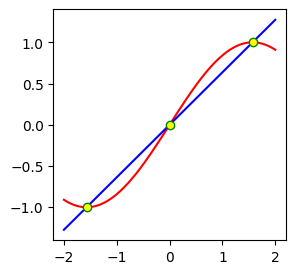

In [2]:
x = np.linspace(-2,2,100)
y=np.sin(x)
z=2*x/np.pi

plt.figure(figsize=(3,3))
plt.plot(x,y,'r')
plt.plot(x,z,'b')
plt.plot(0,0,marker='o', markersize=6, markeredgecolor='green', markerfacecolor = 'yellow')
plt.plot(np.pi/2,1,marker='o', markersize=6, markeredgecolor='green', markerfacecolor = 'yellow')
plt.plot(-np.pi/2,-1,marker='o', markersize=6, markeredgecolor='green', markerfacecolor = 'yellow')

plt.show()

# **Interpolation by a single polynomial**
Given $n+1$ distinct points $(x_0,y_0), (x_1,y_1), (x_2,y_2), \cdots (x_n,y_n)$, a degree $n$ polynomial can be found that passes through each of the $n+1$ points. That is,
$$ p(x) = c_0+c_1x+c_2x^2+ \cdots + c_{n}x^{n} .$$

If the polynomial passes through the above given points, it must satisfy the following system of linear equations.

$$
\begin{pmatrix}
1 & x_0 & x_0^{2} & \cdots & x_0^{n}\\
1 & x_1 & x_1^{2} & \cdots & x_1^{n}\\
& &  & \cdots\\
1 & x_n& x_n^{2} & \cdots & x_n^{n} \end{pmatrix}
\begin{pmatrix}
c_0\\
c_1 \\
\cdots\\
c_{n}
\end{pmatrix} =
\begin{pmatrix}
y_0\\
y_1 \\
\cdots\\
y_n
\end{pmatrix}.
$$

The coefficient matrix is called the Vandermonde matrix.

Solving the above system gives us the values of $c_i$'s , $i=0,1,2,\cdots n$ for which the polynomial is a fit.

#### Does such a polynomial exist for a given dataset with distinct points?

### **Exercise:**
Given the dataset,
$$(1,2),(2,3),(4,1),$$
use the Vandermonde matrix to find a polynomial that passes through all the datapoints.

Find the interpolation polynomial that fits this dataset.

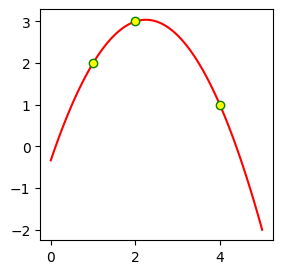

In [3]:
x = np.linspace(0,5,100)
y = (-1/3)+3*x-(2/3)*x**2

plt.figure(figsize=(3,3))
plt.plot(x,y,'r')
plt.plot(1,2,marker='o', markersize=6, markeredgecolor='green', markerfacecolor = 'yellow')
plt.plot(2,3,marker='o', markersize=6, markeredgecolor='green', markerfacecolor = 'yellow')
plt.plot(4,1,marker='o', markersize=6, markeredgecolor='green', markerfacecolor = 'yellow')

plt.show()

### **Coding Example**
Find a polynomial that interpolates the five points $$(0,1),(1,2),(2,2),(3,6),(4,9).$$

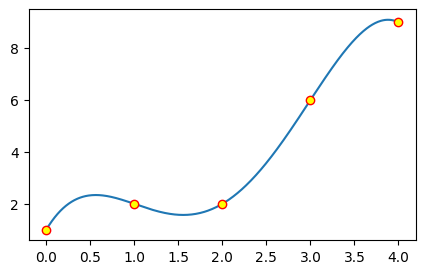

In [4]:
def polyInter(px,py):
    n = len(px)
    A = np.zeros([n,n])
    for i in range(n):
        A[:][i]=px**(i)
    A=A.T

    c=np.linalg.solve(A,py)

    x = np.linspace(px[0],px[n-1],500)
    y= np.sum(np.array([c[i]*x**i for i in range(n)]),axis=0)

    plt.figure(figsize=(5,3))
    plt.plot(x,y)
    for i in range(n):
        plt.plot(px[i],py[i],
                 marker='o', markersize=6,
                 markeredgecolor='red',
                 markerfacecolor = 'yellow')

    plt.show()

px = np.array([0,1,2,3,4])
py = np.array([1,2,2,6,9])
polyInter(px,py)

# **Lagrange Interpolation**
The Lagrange form provides a direct formula without solving systems.

Formula:
$$P_n(x) = \sum\limits_{i=0}^n y_i L_i(x)$$

where each Lagrange basis polynomial is,

$$L_i(x) = \prod\limits_{j=0\\j \neq i}^n \frac{x-x_j}{x_i-x_j}$$

### **Exercise:**
For the dataset
$$(1,2),(2,3),(4,1),$$
write down the Lagrange Interpolation polynomial.

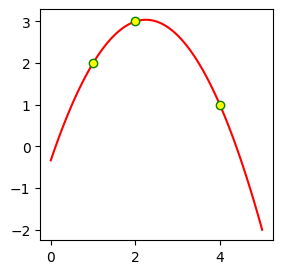

In [5]:
x = np.linspace(0,5,100)
y = 2*((x-2)*(x-4))/((1-2)*(1-4)) + 3*((x-1)*(x-4))/((2-1)*(2-4)) + 1*((x-1)*(x-2))/((4-1)*(4-2))

plt.figure(figsize=(3,3))
plt.plot(x,y,'r')
plt.plot(1,2,marker='o', markersize=6, markeredgecolor='green', markerfacecolor = 'yellow')
plt.plot(2,3,marker='o', markersize=6, markeredgecolor='green', markerfacecolor = 'yellow')
plt.plot(4,1,marker='o', markersize=6, markeredgecolor='green', markerfacecolor = 'yellow')

plt.show()

### **Note:**
For larger datasets, it is a bad idea to interpolate the dataset with a single polynomial.

**Reasons:**
* Very few processes are modeled by a higher degree polynomial.
* Higher order polynomials have oscillatory nature.

### **Example:**
Consider the following dataset,

|Variable|Values|
|---|---|
x| 1, 2, 3, 4, 5, 6, 7, 8, 9, 10|
y| 0, 0.6, 0, 0.15, 0, 0.09, 0, 0.1, 0, 0.2|

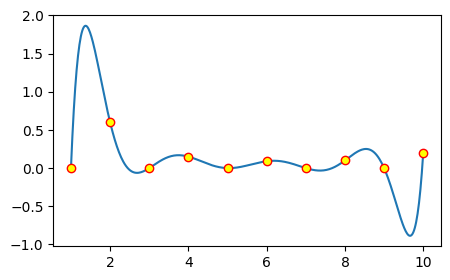

In [6]:
px = np.array([1,2,3,4,5,6,7,8,9,10])
py = np.array([0,0.6,0,0.15,0,0.09,0,0.1,0,0.2])
polyInter(px,py)

# **Piecewise Polynomial Interpolation**
High-degree polynomials often oscillate and are unstable for large $n$.

To improve stability, we can use piecewise low-degree polynomials.

In each subinterval $[x_i, x_{i+1}]$, define a polynomial $P_i(x)$ of small degree, such that,
* $P_i(x_i) = y_i$
* $P_i(x_{i+1}) = y_{i+1}$
* Additional continuity conditions for interior points.



### **Piecewise Linear Interpolation**
For any two consecutive data points $(x_i,y_i)$ and $(x_{i+1},y_{i+1})$ we can draw a straight line through the data points to interpolate. This straight line is given by the following equation:
$$y = y_i + \frac{y_{i+1}-y_i}{x_{i+1}-x_i}(x-x_i).$$
<br>
Which can be rewritten as,
$$ y = y_i \bigg( \frac{x-x_{i+1}}{x_i-x_{i+1}} \bigg) + y_{i+1} \bigg( \frac{x-x_i}{x_{i+1}-x_i} \bigg) = y_i L_i(x)+y_{i+1} L_{i+1}(x).$$
<br>
so that, $L_i(x_i)=1,L_i(x_{i+1})=0 \text{ and } L_{i+1}(x_i)=0,L_{i+1}(x_{i+1})=1$

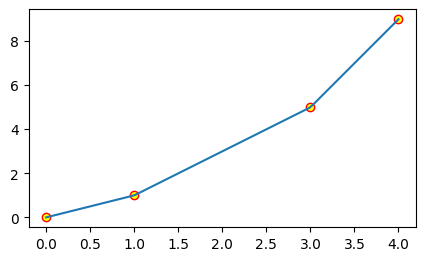

In [7]:
def interpolate(px,py,x,degree=1):
    # Find the sub-interval x lies in.
    n = len(px)
    for i in range(n-1):
        if px[i]<=x and px[i+1]>x:
            indx=i
        if px[n-1]==x:
            return py[n-1]

    # Use the linear interpolation formula for the interval.
    y = py[indx]*(x-px[indx+1])/(px[indx]-px[indx+1]) \
      + py[indx+1]*(x-px[indx])/(px[indx+1]-px[indx])
    return y

px = np.array([0,1,3,4])
py = np.array([0,1,5,9])
n=len(px)
x = np.linspace(px[0],px[n-1], 100)
y = np.zeros(100)
#ind=np.logical_and(x>=1 ,x<=3)
#y[ind] = np.array([interpolate(px,py,xi) for xi in x[ind]
y = np.array([interpolate(px,py,xi) for xi in x])

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1/4)
plt.plot(x,y)
plt.scatter(px,py,c='yellow',edgecolor="red")

plt.show()

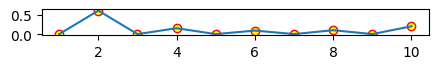

In [8]:
px = np.array([1,2,3,4,5,6,7,8,9,10])
py = np.array([0,0.6,0,0.15,0,0.09,0,0.1,0,0.2])

n=len(px)
x = np.linspace(px[0],px[n-1], 100)
y = np.zeros(100)
#ind=np.logical_and(x>=1 ,x<=3)
#y[ind] = np.array([interpolate(px,py,xi) for xi in x[ind]
y = np.array([interpolate(px,py,xi) for xi in x])

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.plot(x,y)
plt.scatter(px,py,c='yellow',edgecolor="red")

plt.show()

# **Cubic Spline**

In **cubic spline interpolation** (as shown in the following figure), the interpolating function is a set of piecewise cubic functions. Specifically, we assume that the points $(x_i, y_i)$ and $(x_{i+1}, y_{i+1})$ are joined by a cubic polynomial $S_i(x) = a_i x^3 + b_i x^2 + c_i x + d_i$ that is valid for $x_i \le x \le x_{i+1}$ for $i = 0, \ldots, n-1$. To find the interpolating function, we must first determine the coefficients $a_i, b_i, c_i, d_i$ for each of the cubic functions. For $n+1$ points, there are $n$ cubic functions, $S_0, S_1, \cdots , S_{n-1}$ to find, and each cubic function requires four coefficients. Therefore we have a total of $4n$ unknowns, and so we need $4n$ independent equations to find all the coefficients.<br><br>

First we know that the cubic functions must intersect the data the points on the left and the right:
$$\begin{align*}
S_i(x_i) &= y_i, \quad i = 0, \ldots,n-1 \\
S_i(x_{i+1}) &= y_{i+1}, \quad i = 0, \ldots,n-1 \\
\end{align*}
$$

which gives us $2n$ equations. Next, we want each cubic function to join as smoothly with its neighbors as possible, so we constrain the splines to have continuous first and second derivatives at the data points $i = 1, \ldots,n-1.$

$$
\begin{align*}
S'_i(x_{i+1}) &= S'_{i+1}(x_{i+1}), \quad i = 0, \ldots,n-2, \\
S''_i(x_{i+1}) &= S''_{i+1}(x_{i+1}), \quad i = 0, \ldots,n-2, \\
\end{align*}
$$

which gives us $2(n-1)$ equations. Two more equations are required to compute the coefficients of $S_i(x)$. These last two constraints are arbitrary, and they can be chosen to fit the circumstances of the interpolation being performed. A common set of final constraints is to assume that the second derivatives are zero at the endpoints. This means that the curve is a \"straight line\" at the end points. Explicitly,

$$\begin{align*}
S''_0(x_0) &= 0, \\
S''_{n-1}(x_n) &= 0.
\end{align*}
$$
In Python, we can use function *CubicSpline* from package *scipy* to perform cubic spline interpolation. Note that the above constraints are not the same as the ones used by *scipy's CubicSpline* as default for performing cubic splines, there are different ways to add the final two constraints in scipy by setting the *bc_type* argument (see the help for *CubicSpline* to learn more about this).

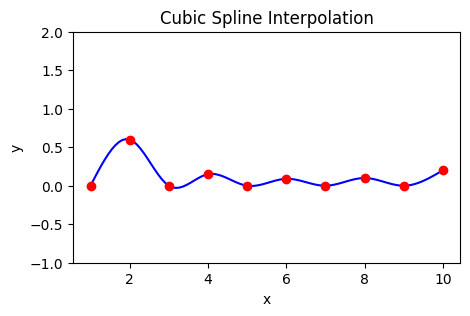

In [9]:
px = np.array([1,2,3,4,5,6,7,8,9,10])
py = np.array([0,0.6,0,0.15,0,0.09,0,0.1,0,0.2])
n=len(px)

f = CubicSpline(px, py, bc_type='natural')

x = np.linspace(px[0],px[n-1], 100)
y = f(x)
plt.figure(figsize = (5,3))
plt.plot(x, y, 'b')
plt.plot(px, py, 'ro')
plt.ylim(-1,2)
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# **Curve fitting**

* Trying to have an approximating function pass through every single data point is not always practical.

* Error in data can result in significant error in interpolation.

* Find a simple function instead that need not pass through data points, but  still represents the data.

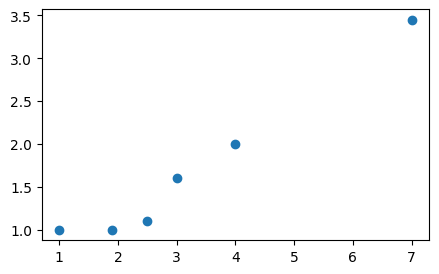

In [10]:
# Example dataset
data = np.array([[1, 1.9, 2.5, 3, 4, 7], [1, 1, 1.1 ,1.6, 2, 3.45]])
plt.figure(figsize=(5,3))
plt.scatter(data[0], data[1])
plt.show()

# **Linear fit**

* We want to find a straight line $y= a_0+a_1x$ that fits the data.

* What are the constants $a_0$ and $a_1$ for the line of best fit?

* Our objective will be to minimize the error :

$$
\begin{align*}
e(a_0,a_1) &= \sum\limits_{i=1}^n (y_i-(a_0+a_1x_i))^2\\
&= \sum\limits_{i=1}^n y_i^2 - 2a_0\sum\limits_{i=1}^n y_i -
2a_1 \sum\limits_{i=1}^n x_i y_i +
n a_0^2 + a_1^2\sum\limits_{i=1}^n x_i^2 +2a_0a_1\sum\limits_{i=1}^n x_i.
\end{align*}
$$

* The error is minimum when,
$$
\begin{align*}
\frac{\delta e}{\delta a_0} = -2Y + 2na_0 + 2a_1X = 0 \\
\frac{\delta e}{\delta a_1} = -2Z + 2a_1W + 2a_0X = 0.
\end{align*}
$$
where,
$$
\begin{align*}
X = \sum\limits_{i=1}^n x_i,
Y = \sum\limits_{i=1}^n y_i,
W = \sum\limits_{i=1}^n x_i^2,
Z = \sum\limits_{i=1}^n x_i y_i
\end{align*}
$$
Hence we obtain the ideal coefficients by solving the linear system,
$$
\begin{bmatrix}
n & X\\
X & W
\end{bmatrix}
\begin{bmatrix}
a_0\\
a_1
\end{bmatrix}
=
\begin{bmatrix}
Y\\
Z
\end{bmatrix}
$$

### **Exercise:**
Given the following dataset,
$$(1,1),(1.9,1),(2.5,1.1),(3,1.6),(4,2),(7,3.45),$$
find the equation of the line of best fit.

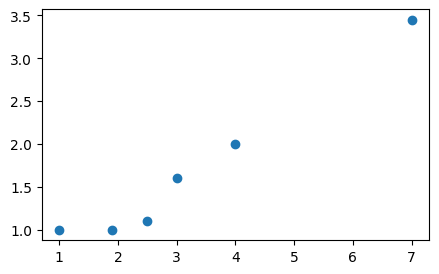

Constants are  0.26271837349397364  and  0.4419427710843378


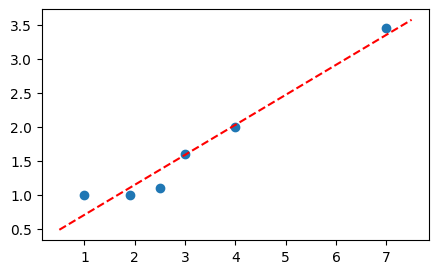

In [11]:
data = np.array([[1, 1.9, 2.5, 3, 4, 7], [1, 1, 1.1 ,1.6, 2, 3.45]])
plt.figure(figsize=(5,3))
plt.scatter(data[0], data[1])
plt.show()

n = len(data[0])
X=np.sum(data[0])
Y=np.sum(data[1])
W=np.sum(data[0]**2)
Z=np.sum(np.multiply(data[0],data[1]))
Z
c = np.matmul(np.linalg.inv(np.array([[n,X],[X,W]])),np.array([Y,Z]))
print("Constants are ",c[0], " and ", c[1])


x=np.linspace(0.5,7.5,100)
plt.figure(figsize=(5,3))
plt.scatter(data[0], data[1])
plt.plot(x, c[0]+c[1]*x,'r--')
plt.show()

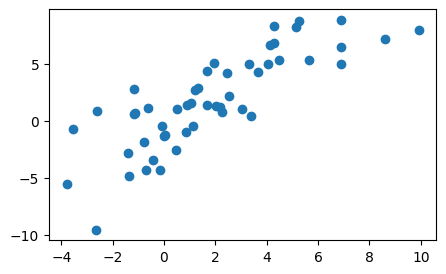

In [12]:
n=50
x = 2+3*np.random.normal(0,1,n)
avg = np.average(x)
yReal = x+1
r = np.random.normal(0,1,n)
y = x + 1+ 2*r/(1+np.average(x-avg))
r = np.random.rand(n)
y = y - 2*r/(1+np.average(x-avg))

#plt.plot(x,yReal)
plt.figure(figsize=(5,3))
plt.scatter(x,y)

plt.show()

Constants are  -0.19537523603931548  and  1.1131424676242692


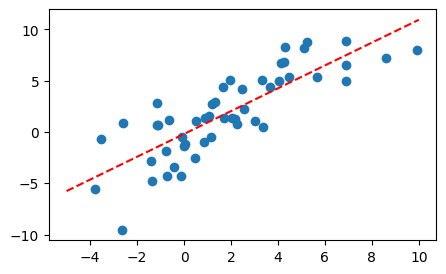

In [13]:
# @title
data = np.array([x, y])
n = len(data[0])
X=np.sum(data[0])
Y=np.sum(data[1])
W=np.sum(data[0]**2)
Z=np.sum(np.multiply(data[0],data[1]))
Z
c = np.matmul(np.linalg.inv(np.array([[n,X],[X,W]])),np.array([Y,Z]))
print("Constants are ",c[0], " and ", c[1])

p=np.linspace(-5,10,100)
plt.figure(figsize=(5,3))
plt.scatter(data[0], data[1])
plt.plot(p, c[0]+c[1]*p,'r--')
plt.show()

# **Curve of best fit**
Three types of curves we consider are:</br>
$$
\begin{align*}
    \text{1.} & y=be^{mx} \\
    \text{2.} & y = \frac{1}{mx+b}\\
    \text{3.} & y= bx^m
\end{align*}
$$

The procedure for finding curves of best fit:

1. Linearize the data through transformation.
2. Fit a line of best fit to the linearized data points.
3. Reverse transform the line to get the curve of best fit.

### **Steps**
1. Look at data and determine what kind of function that data might represent.
* If the data comes from $y = be^{mx}$, then logging both sides gives $\ln(y) = \ln(b) +mx$. Thus a plot of $x$ vs. $\ln(y)$ will look linear.
* If the data comes from $y = \frac{1}{mx+b}$ , then taking reciprocals of both sides gives $y^{−1} = mx + b$, so a plot of $x vs. y^{-1}$ will look linear.
* If the data comes from $y = bx^m$, then taking logs of both sides gives $\ln(y) =\ln(b) + m \ln(x)$. Thus a plot of $\ln(x)$ vs. $\ln(y)$ will look linear.

2. Once we have linearized data, we find the line of best fit for it.

3. Transform back to obtain the curve for the original data.

* Exponential case: We fit a line $\ln(y) = a0 + a1x$, then to un-transform, we raise both sides to the power of $e$ and get $y = e^{a0+a1x} = e^{a0} e^{a1x}$. If we set $b = e^{a0}$ and $m = a1$, we now have our parameters for a curve of best fit.


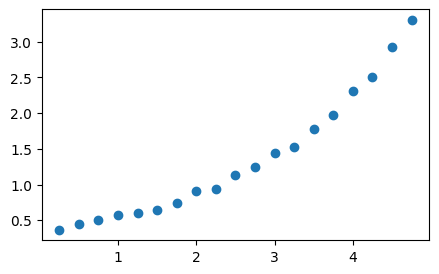

In [14]:
x = np.array(np.linspace(0.25,4.75,19))
y = np.array([0.3662, 0.4506, 0.5054, 0.5694, 0.6055, 0.6435, 0.7426, 0.9068, 0.9393, 1.1297, 1.2404, 1.4441, 1.5313, 1.7706, 1.9669, 2.3129, 2.5123, 2.9238, 3.3070])
plt.figure(figsize=(5,3))
plt.scatter(x,y)
plt.show()

If the data is exponential, then $(x,log(y))$ should look linear

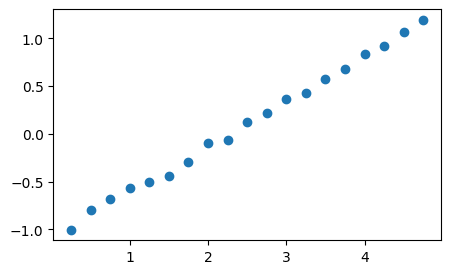

In [15]:
# log(y)
plt.figure(figsize=(5,3))
plt.scatter(x,np.log(y))
plt.show()

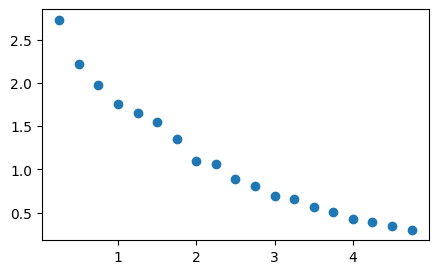

In [16]:
# 1/y
plt.figure(figsize=(5,3))
plt.scatter(x,1/y)
plt.show()

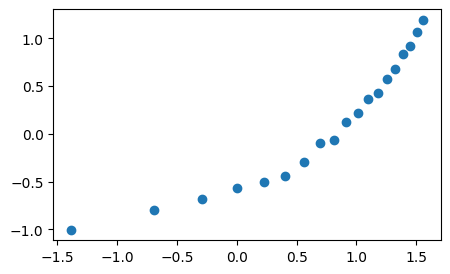

In [17]:
# (log x, log y)
plt.figure(figsize=(5,3))
plt.scatter(np.log(x),np.log(y))
plt.show()

In [18]:
n = len(x)
logy=np.log(y)
X=np.sum(x)
Y=np.sum(logy)
W=np.sum(x**2)
Z=np.sum(np.multiply(x,logy))

c = np.matmul(np.linalg.inv(np.array([[n,X],[X,W]])),np.array([Y,Z]))

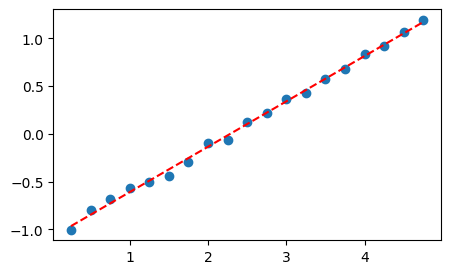

In [19]:
xval=np.linspace(0.25,4.75,100)
plt.figure(figsize=(5,3))
plt.scatter(x, logy)
plt.plot(xval, c[0]+c[1]*xval,'r--')
plt.show()

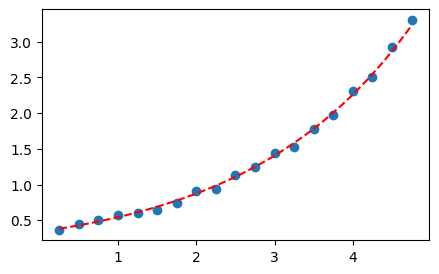

In [20]:
xval=np.linspace(0.25,4.75,100)
plt.figure(figsize=(5,3))
plt.scatter(x, y)
plt.plot(xval, np.exp(c[0]+c[1]*xval),'r--')
plt.show()

-1.0849491985680524 0.47523187744400863
-0.42407873410977476 0.770519298587569
2.310189024084322 -0.482195061334397


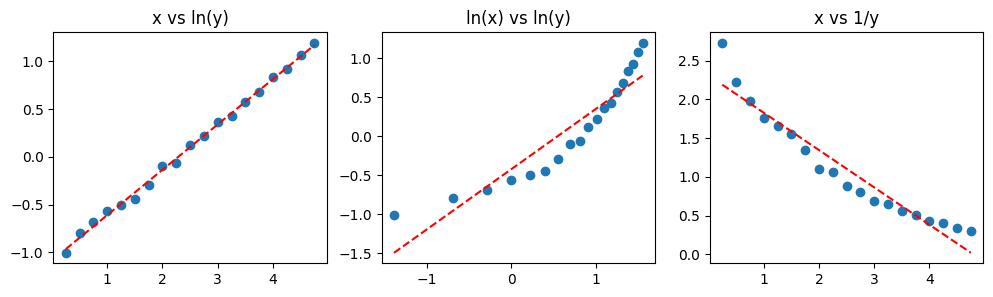

In [21]:
# @title
fig, axs = plt.subplots(1, 3, figsize=(12,3))

xval=np.linspace(0.25,4.75,100)
axs[0].scatter(x, np.log(y))
axs[0].set_title('x vs ln(y)')
n = len(x)
logy=np.log(y)
X=np.sum(x)
Y=np.sum(logy)
W=np.sum(x**2)
Z=np.sum(np.multiply(x,logy))
c = np.matmul(np.linalg.inv(np.array([[n,X],[X,W]])),np.array([Y,Z]))
axs[0].plot(xval, c[0]+c[1]*xval,'r--')
print(c[0],c[1])

xval=np.linspace(np.log(0.25),np.log(4.75),100)
axs[1].scatter(np.log(x), np.log(y))
axs[1].set_title('ln(x) vs ln(y)')
n = len(x)
logx=np.log(x)
logy=np.log(y)
X=np.sum(logx)
Y=np.sum(logy)
W=np.sum(logx**2)
Z=np.sum(np.multiply(logx,logy))
c = np.matmul(np.linalg.inv(np.array([[n,X],[X,W]])),np.array([Y,Z]))
axs[1].plot(xval, c[0]+c[1]*xval,'r--')
print(c[0],c[1])

xval=np.linspace(0.25,4.75,100)
axs[2].scatter(x, 1/y)
axs[2].set_title('x vs 1/y')
n = len(x)
recy=1/y
X=np.sum(x)
Y=np.sum(recy)
W=np.sum(x**2)
Z=np.sum(np.multiply(x,recy))
c = np.matmul(np.linalg.inv(np.array([[n,X],[X,W]])),np.array([Y,Z]))
axs[2].plot(xval, c[0]+c[1]*xval,'r--')
print(c[0],c[1])
